In [635]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [636]:
olympics = pd.read_csv("Olympics2024.csv")
olympics.head(10)

,Competitions,Rank,NOC,Gold,Silver,Bronze,Total
0,Archery,1,South Korea,5,1,1,7
1,Archery,2,France*,0,1,1,2
2,Archery,3,United States,0,1,1,2
3,Archery,4,China,0,1,0,1
4,Archery,5,Germany,0,1,0,1
5,Archery,6,Mexico,0,0,1,1
6,Archery,7,Turkey,0,0,1,1
7,Artistic swimming,1,China,2,0,0,2
8,Artistic swimming,2,Great Britain,0,1,0,1
9,Artistic swimming,3,United States,0,1,0,1


In [637]:
olympics.describe()


,Gold,Silver,Bronze,Total
count,454.000000,454.000000,454.000000,454.000000
mean,0.724670,0.726872,0.848018,2.299559
std,1.329396,1.228912,1.110370,2.900582
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,2.000000
max,14.000000,13.000000,9.000000,34.000000


In [638]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Competitions  454 non-null    object
 1   Rank          454 non-null    object
 2   NOC           454 non-null    object
 3   Gold          454 non-null    int64 
 4   Silver        454 non-null    int64 
 5   Bronze        454 non-null    int64 
 6   Total         454 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 25.0+ KB


Competitions
Archery               15
Artistic swimming      6
Athletics            145
Badminton             15
Basketball            12
Boxing                52
Breaking               6
Canoeing              49
Cycling               66
Diving                24
Equestrian            18
Fencing               36
Field hockey           6
Football               6
Golf                   6
Gymnastics            55
Handball               6
Judo                  60
Modern pentathlon      6
Rowing                42
Rugby sevens           6
Sailing               30
Shooting              45
Skateboarding         12
Sport climbing        12
Surfing                6
Swimming             111
Table tennis          15
Taekwondo             32
Tennis                15
Triathlon              9
Volleyball            12
Water polo             6
Weightlifting         30
Wrestling             72
Name: TotalMedalBySport, dtype: int64


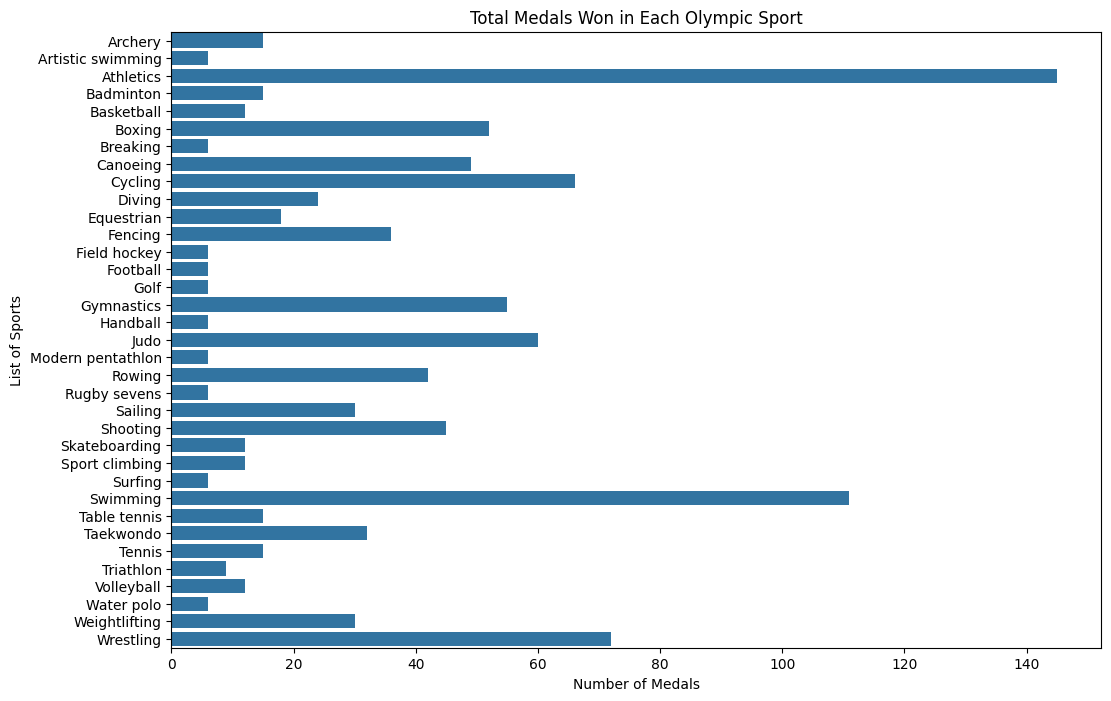

In [639]:
#Q1
medals_by_sports = olympics.groupby('Competitions').agg({'Gold': 'sum','Silver': 'sum','Bronze': 'sum'})
medals_by_sports['TotalMedalBySport'] = medals_by_sports[['Gold', 'Silver', 'Bronze']].sum(axis=1)
print(medals_by_sports['TotalMedalBySport'])

plt.figure(figsize=(12, 8))
sns.barplot(data=medals_by_sports, y='Competitions', x='TotalMedalBySport')
plt.xlabel('Number of Medals')
plt.ylabel('List of Sports')
plt.title('Total Medals Won in Each Olympic Sport')
plt.show()

NOC
 Albania            2
 Algeria            3
 Argentina          3
 Armenia            4
 Australia         53
                 ... 
 Uganda             2
 Ukraine           12
 United States    126
 Uzbekistan        13
 Zambia             1
Name: TotalMedalByCountry, Length: 93, dtype: int64


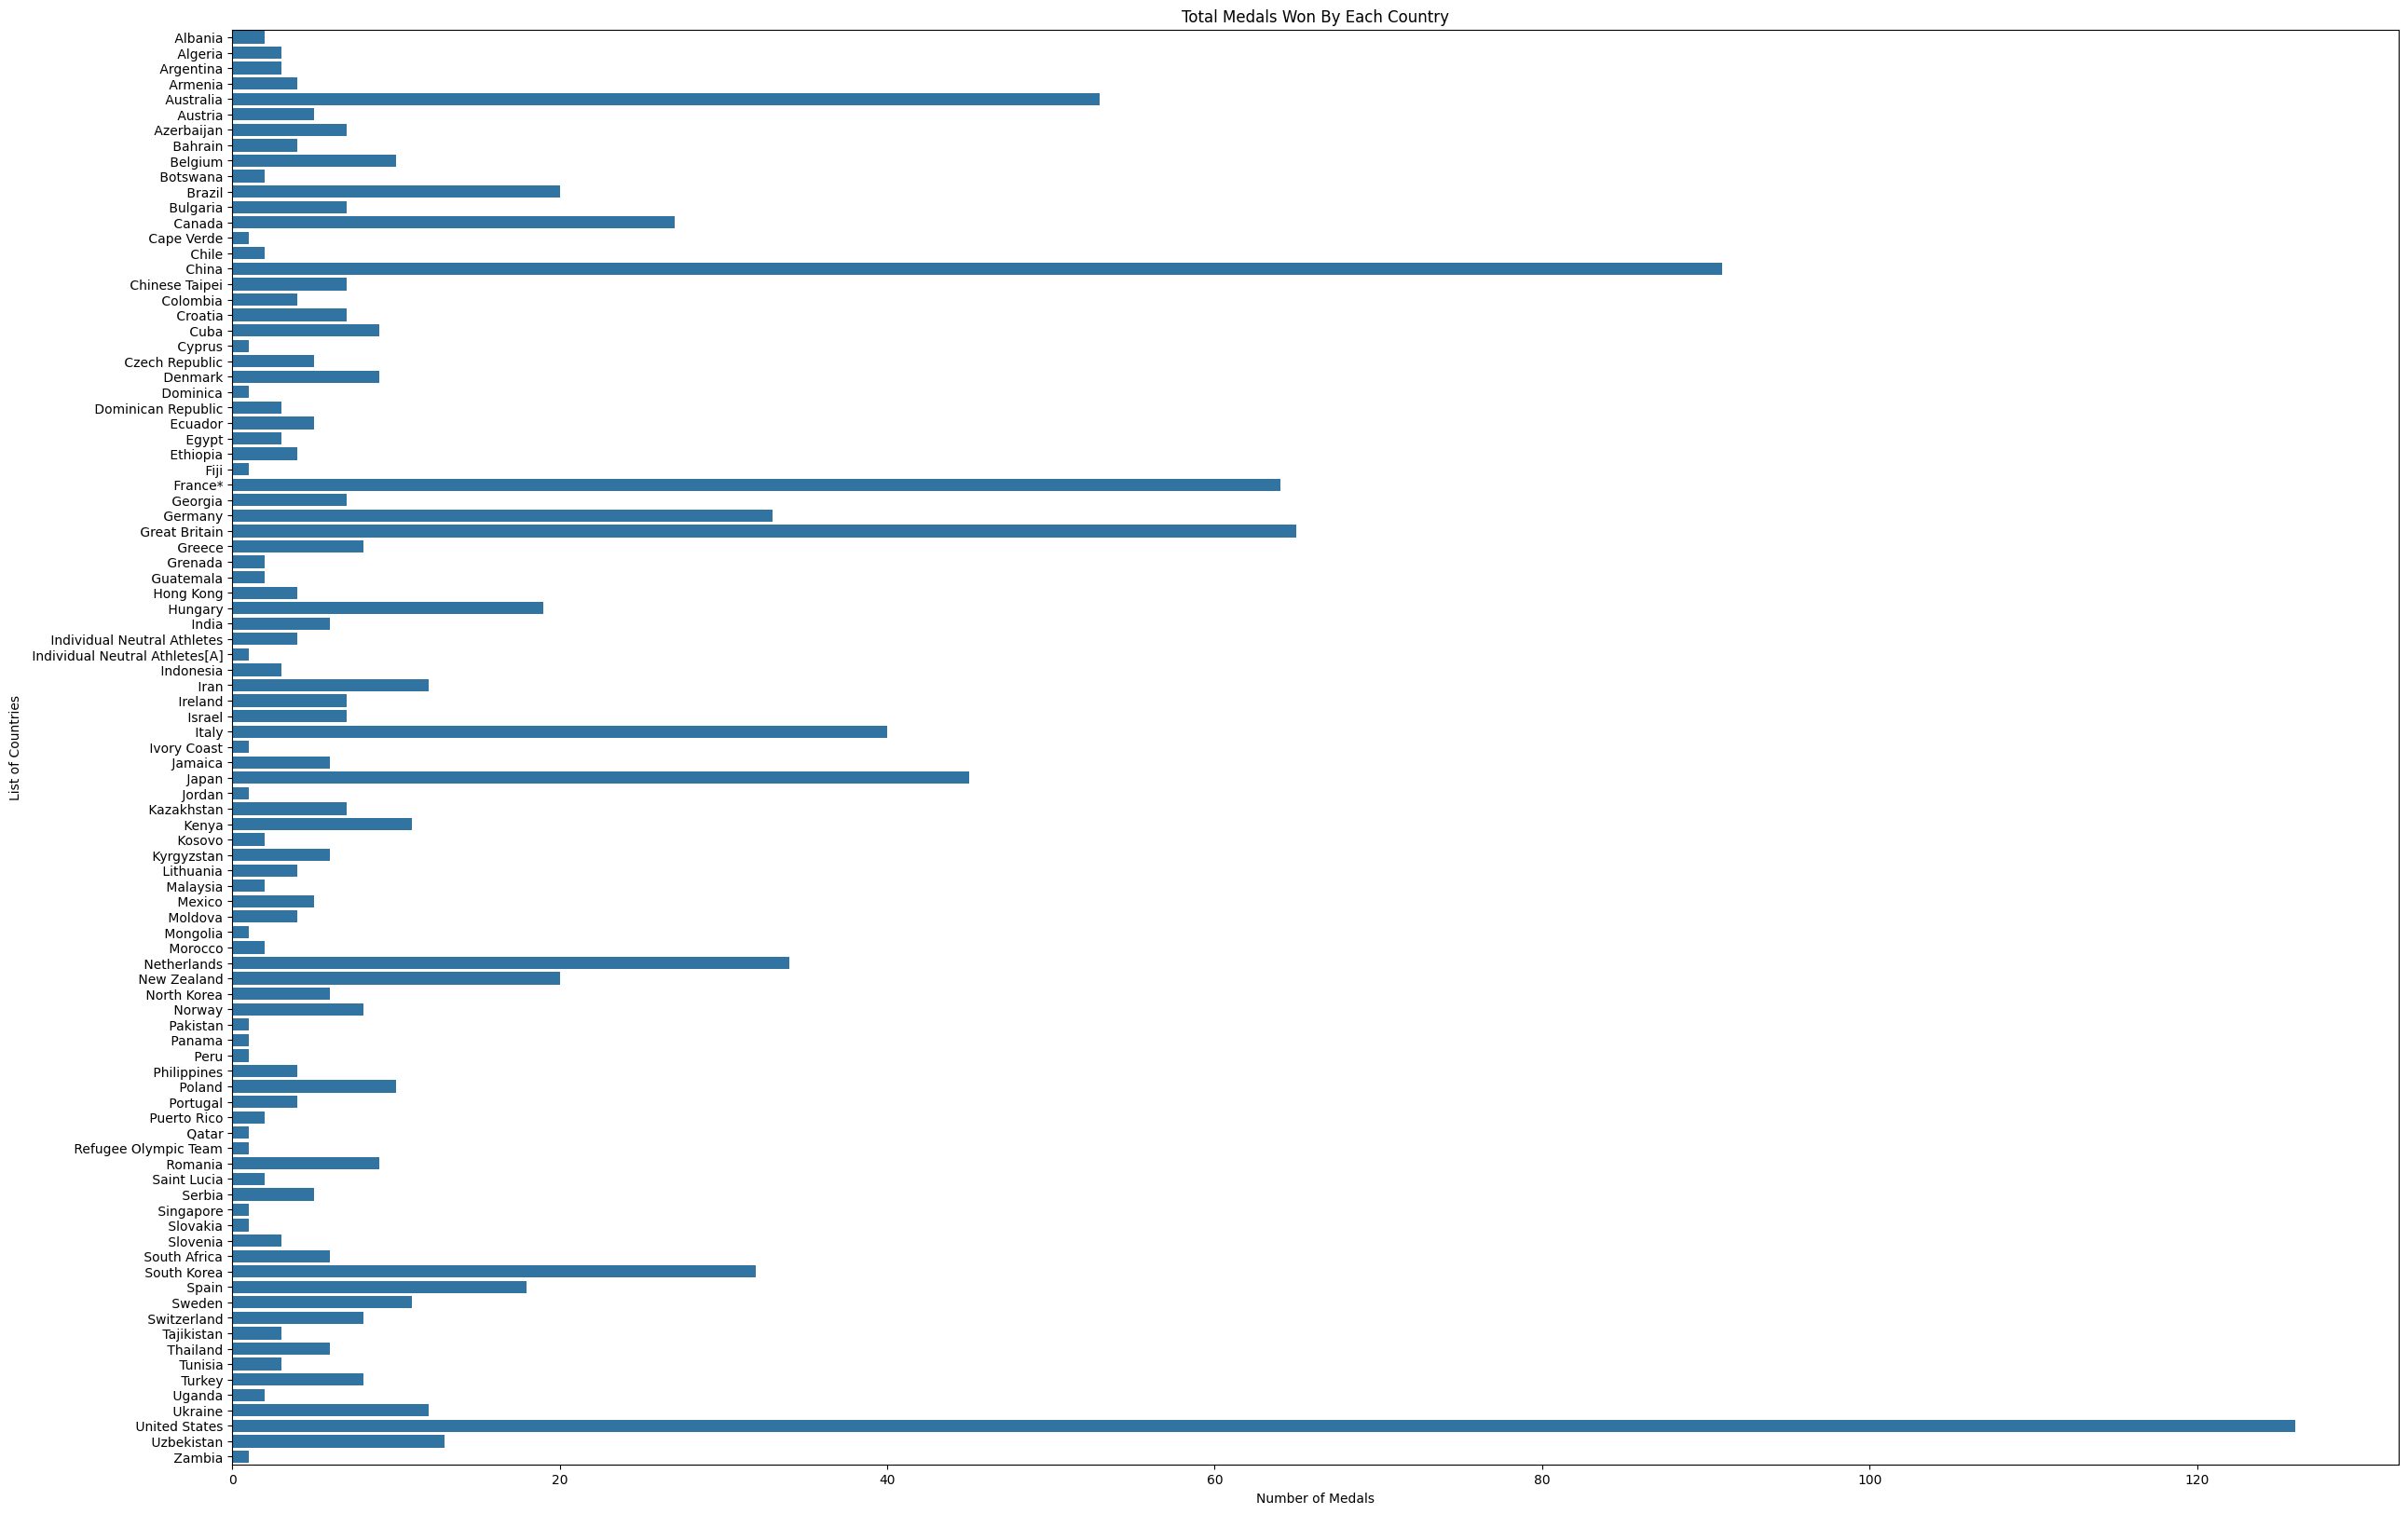

In [640]:
#Q2
medals_by_country = olympics.groupby('NOC').agg({'Gold': 'sum','Silver': 'sum','Bronze': 'sum'})
medals_by_country['TotalMedalByCountry'] = medals_by_country[['Gold', 'Silver', 'Bronze']].sum(axis=1)
print(medals_by_country['TotalMedalByCountry'])

plt.figure(figsize=(30, 20))
sns.barplot(data=medals_by_country, y='NOC', x='TotalMedalByCountry')
plt.xlabel('Number of Medals')
plt.ylabel('List of Countries')
plt.title('Total Medals Won By Each Country')
plt.show()



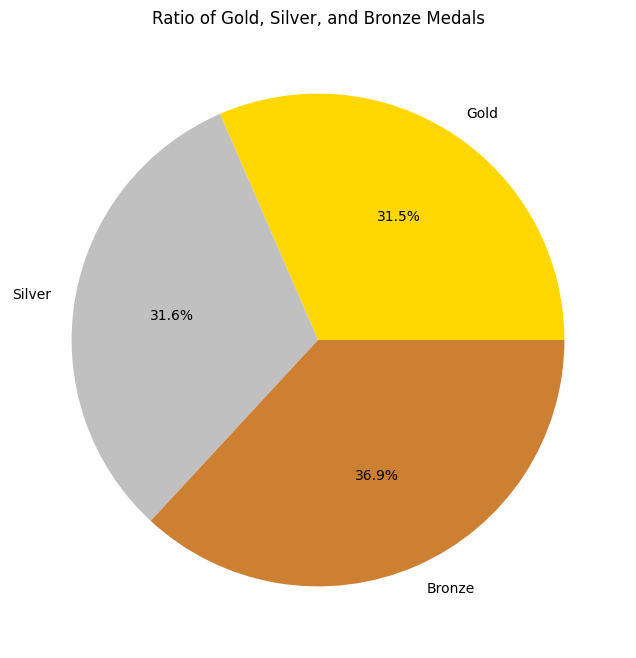

In [641]:
#Q3
total_gold = olympics['Gold'].sum()
total_silver = olympics['Silver'].sum()
total_bronze = olympics['Bronze'].sum()

medals = [total_gold, total_silver, total_bronze]
labels = ['Gold', 'Silver', 'Bronze']
colors = ['#FFD700', '#C0C0C0', '#CD7F32']  

plt.figure(figsize=(12, 8))
plt.pie(x=medals, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Ratio of Gold, Silver, and Bronze Medals')
plt.show()

              NOC  Gold
0           China    40
1   United States    40
2           Japan    20
3       Australia    18
4         France*    16


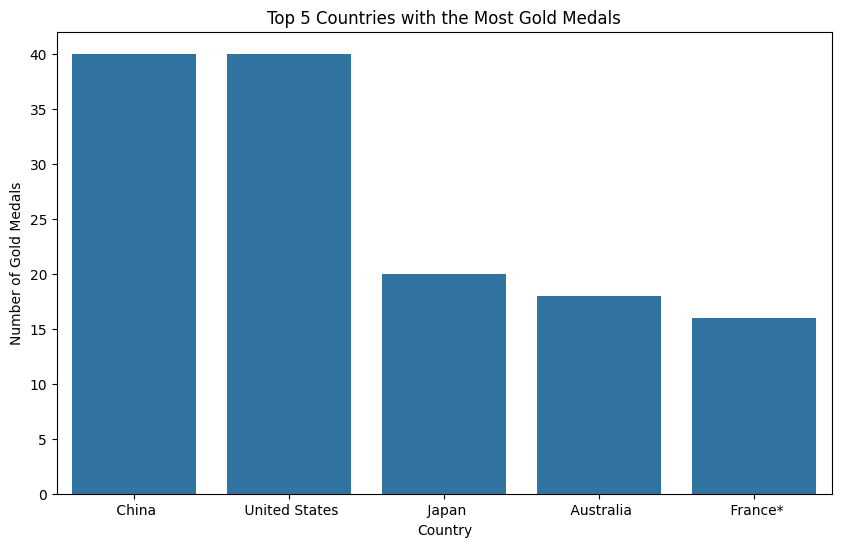

In [642]:
#Q4
gold_medals_by_country = olympics.groupby('NOC')['Gold'].sum()

top5goldcountries = gold_medals_by_country.sort_values(ascending=False).head(5)
top5goldcountries = top5goldcountries.reset_index()
print(top5goldcountries)

plt.figure(figsize=(10, 6))
sns.barplot(data=top5goldcountries, x='NOC', y='Gold')
plt.xlabel('Country')
plt.ylabel('Number of Gold Medals')
plt.title('Top 5 Countries with the Most Gold Medals')
plt.show()

              NOC  Silver
0   United States      44
1           China      27
2         France*      26
3   Great Britain      22
4       Australia      19


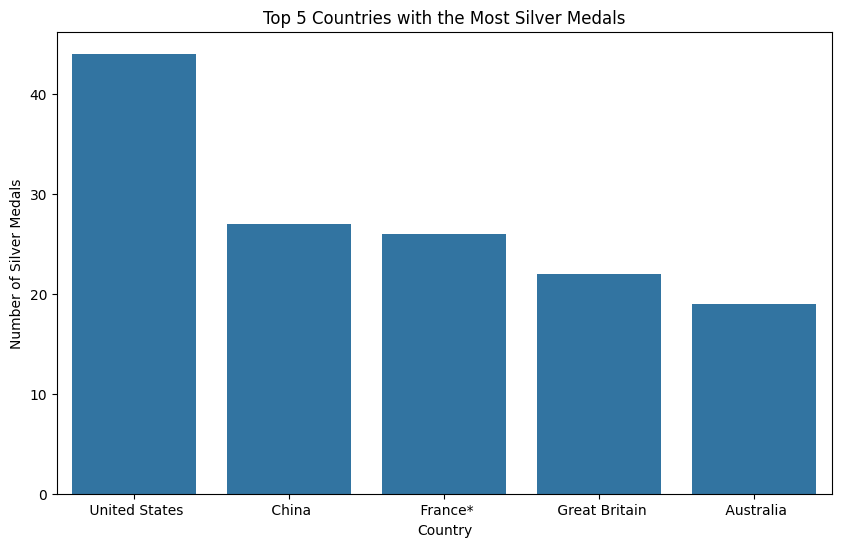

In [643]:
#Q5
silver_medals_by_country = olympics.groupby('NOC')['Silver'].sum()

top5silvercountries = silver_medals_by_country.sort_values(ascending=False).head(5)
top5silvercountries = top5silvercountries.reset_index()
print(top5silvercountries)

plt.figure(figsize=(10, 6))
sns.barplot(data=top5silvercountries, x='NOC', y='Silver')
plt.xlabel('Country')
plt.ylabel('Number of Silver Medals')
plt.title('Top 5 Countries with the Most Silver Medals')
plt.show()

              NOC  Bronze
0   United States      42
1   Great Britain      29
2           China      24
3         France*      22
4       Australia      16


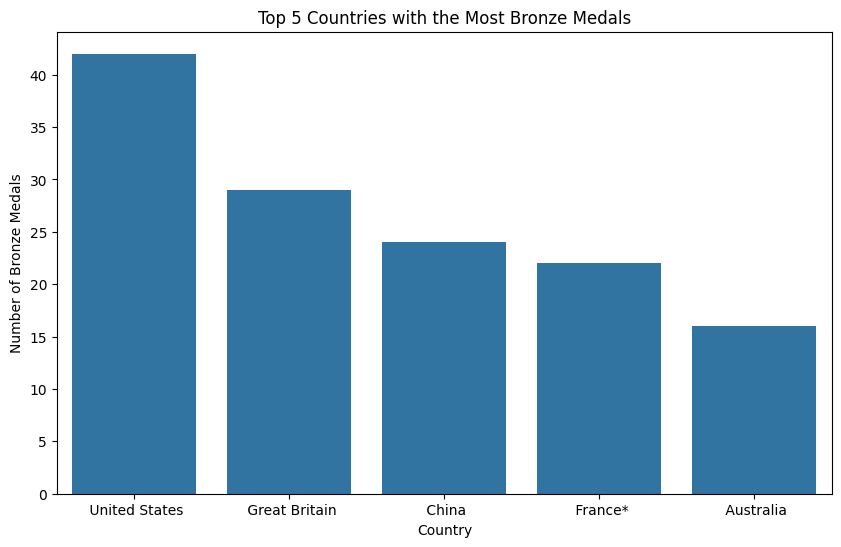

In [644]:
#Q6
bronze_medals_by_country = olympics.groupby('NOC')['Bronze'].sum()

top5bronzecountries = bronze_medals_by_country.sort_values(ascending=False).head(5)
top5bronzecountries = top5bronzecountries.reset_index()
print(top5bronzecountries)

plt.figure(figsize=(10, 6))
sns.barplot(data=top5bronzecountries, x='NOC', y='Bronze')
plt.xlabel('Country')
plt.ylabel('Number of Bronze Medals')
plt.title('Top 5 Countries with the Most Bronze Medals')
plt.show()

  Competitions  Gold
0    Athletics    48
1     Swimming    37
2      Cycling    22
3    Wrestling    18
4   Gymnastics    18


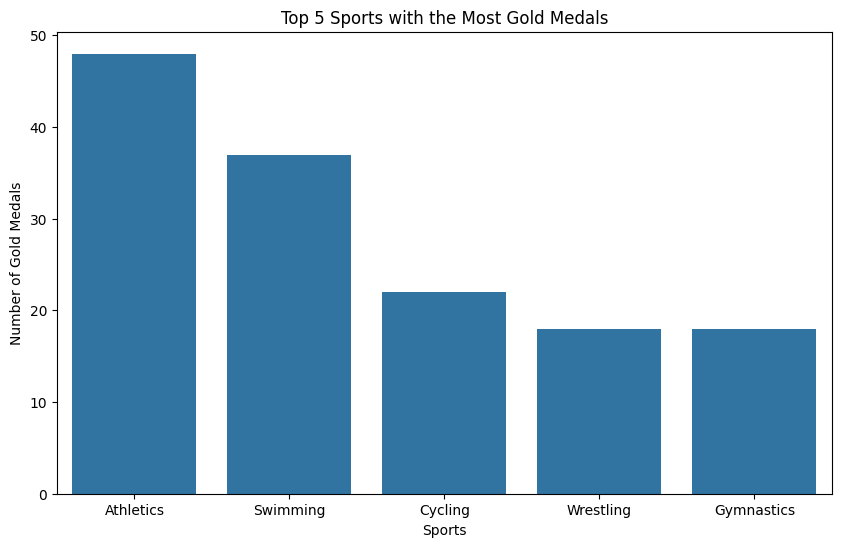

In [645]:
#Q7
gold_medals_by_sport = olympics.groupby('Competitions')['Gold'].sum()

top5goldsports = gold_medals_by_sport.sort_values(ascending=False).head(5)
top5goldsports = top5goldsports.reset_index()
print(top5goldsports)

plt.figure(figsize=(10, 6))
sns.barplot(data=top5goldsports, x='Competitions', y='Gold')
plt.xlabel('Sports')
plt.ylabel('Number of Gold Medals')
plt.title('Top 5 Sports with the Most Gold Medals')
plt.show()

  Competitions  Silver
0    Athletics      48
1     Swimming      38
2      Cycling      22
3    Wrestling      18
4   Gymnastics      18


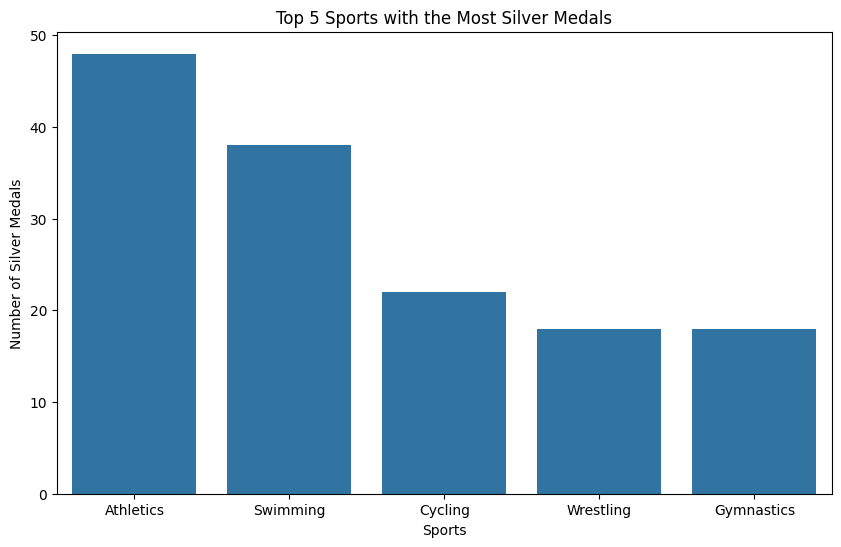

In [646]:
#Q8
silver_medals_by_sport = olympics.groupby('Competitions')['Silver'].sum()

top5silversports = silver_medals_by_sport.sort_values(ascending=False).head(5)
top5silversports = top5silversports.reset_index()
print(top5silversports)

plt.figure(figsize=(10, 6))
sns.barplot(data=top5silverports, x='Competitions', y='Silver')
plt.xlabel('Sports')
plt.ylabel('Number of Silver Medals')
plt.title('Top 5 Sports with the Most Silver Medals')
plt.show()

  Competitions  Bronze
0    Athletics      49
1    Wrestling      36
2     Swimming      36
3         Judo      30
4       Boxing      26


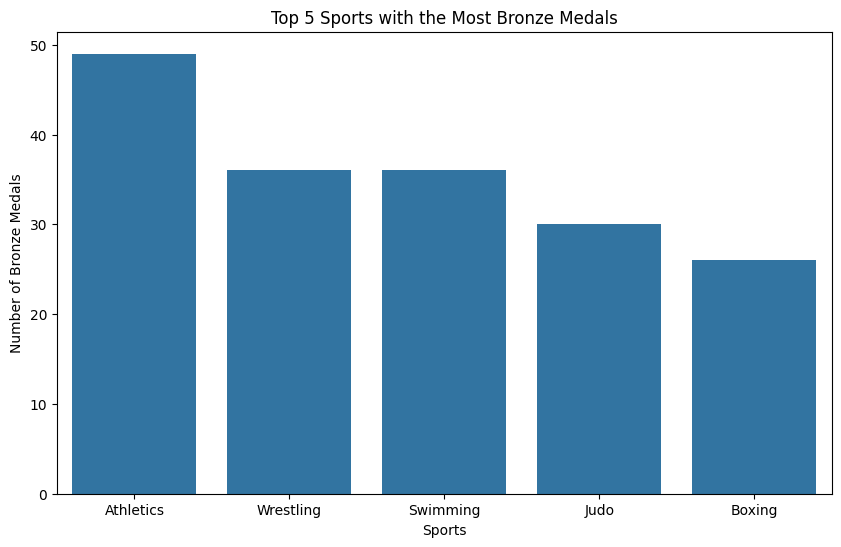

In [647]:
#Q9
bronze_medals_by_sport = olympics.groupby('Competitions')['Bronze'].sum()

top5bronzesports = bronze_medals_by_sport.sort_values(ascending=False).head(5)
top5bronzesports = top5bronzesports.reset_index()
print(top5bronzesports)

plt.figure(figsize=(10, 6))
sns.barplot(data=top5bronzesports, x='Competitions', y='Bronze')
plt.xlabel('Sports')
plt.ylabel('Number of Bronze Medals')
plt.title('Top 5 Sports with the Most Bronze Medals')
plt.show()

Competitions
Archery               1.436782
Artistic swimming     0.574713
Athletics            13.888889
Badminton             1.436782
Basketball            1.149425
Boxing                4.980843
Breaking              0.574713
Canoeing              4.693487
Cycling               6.321839
Diving                2.298851
Equestrian            1.724138
Fencing               3.448276
Field hockey          0.574713
Football              0.574713
Golf                  0.574713
Gymnastics            5.268199
Handball              0.574713
Judo                  5.747126
Modern pentathlon     0.574713
Rowing                4.022989
Rugby sevens          0.574713
Sailing               2.873563
Shooting              4.310345
Skateboarding         1.149425
Sport climbing        1.149425
Surfing               0.574713
Swimming             10.632184
Table tennis          1.436782
Taekwondo             3.065134
Tennis                1.436782
Triathlon             0.862069
Volleyball            1.14

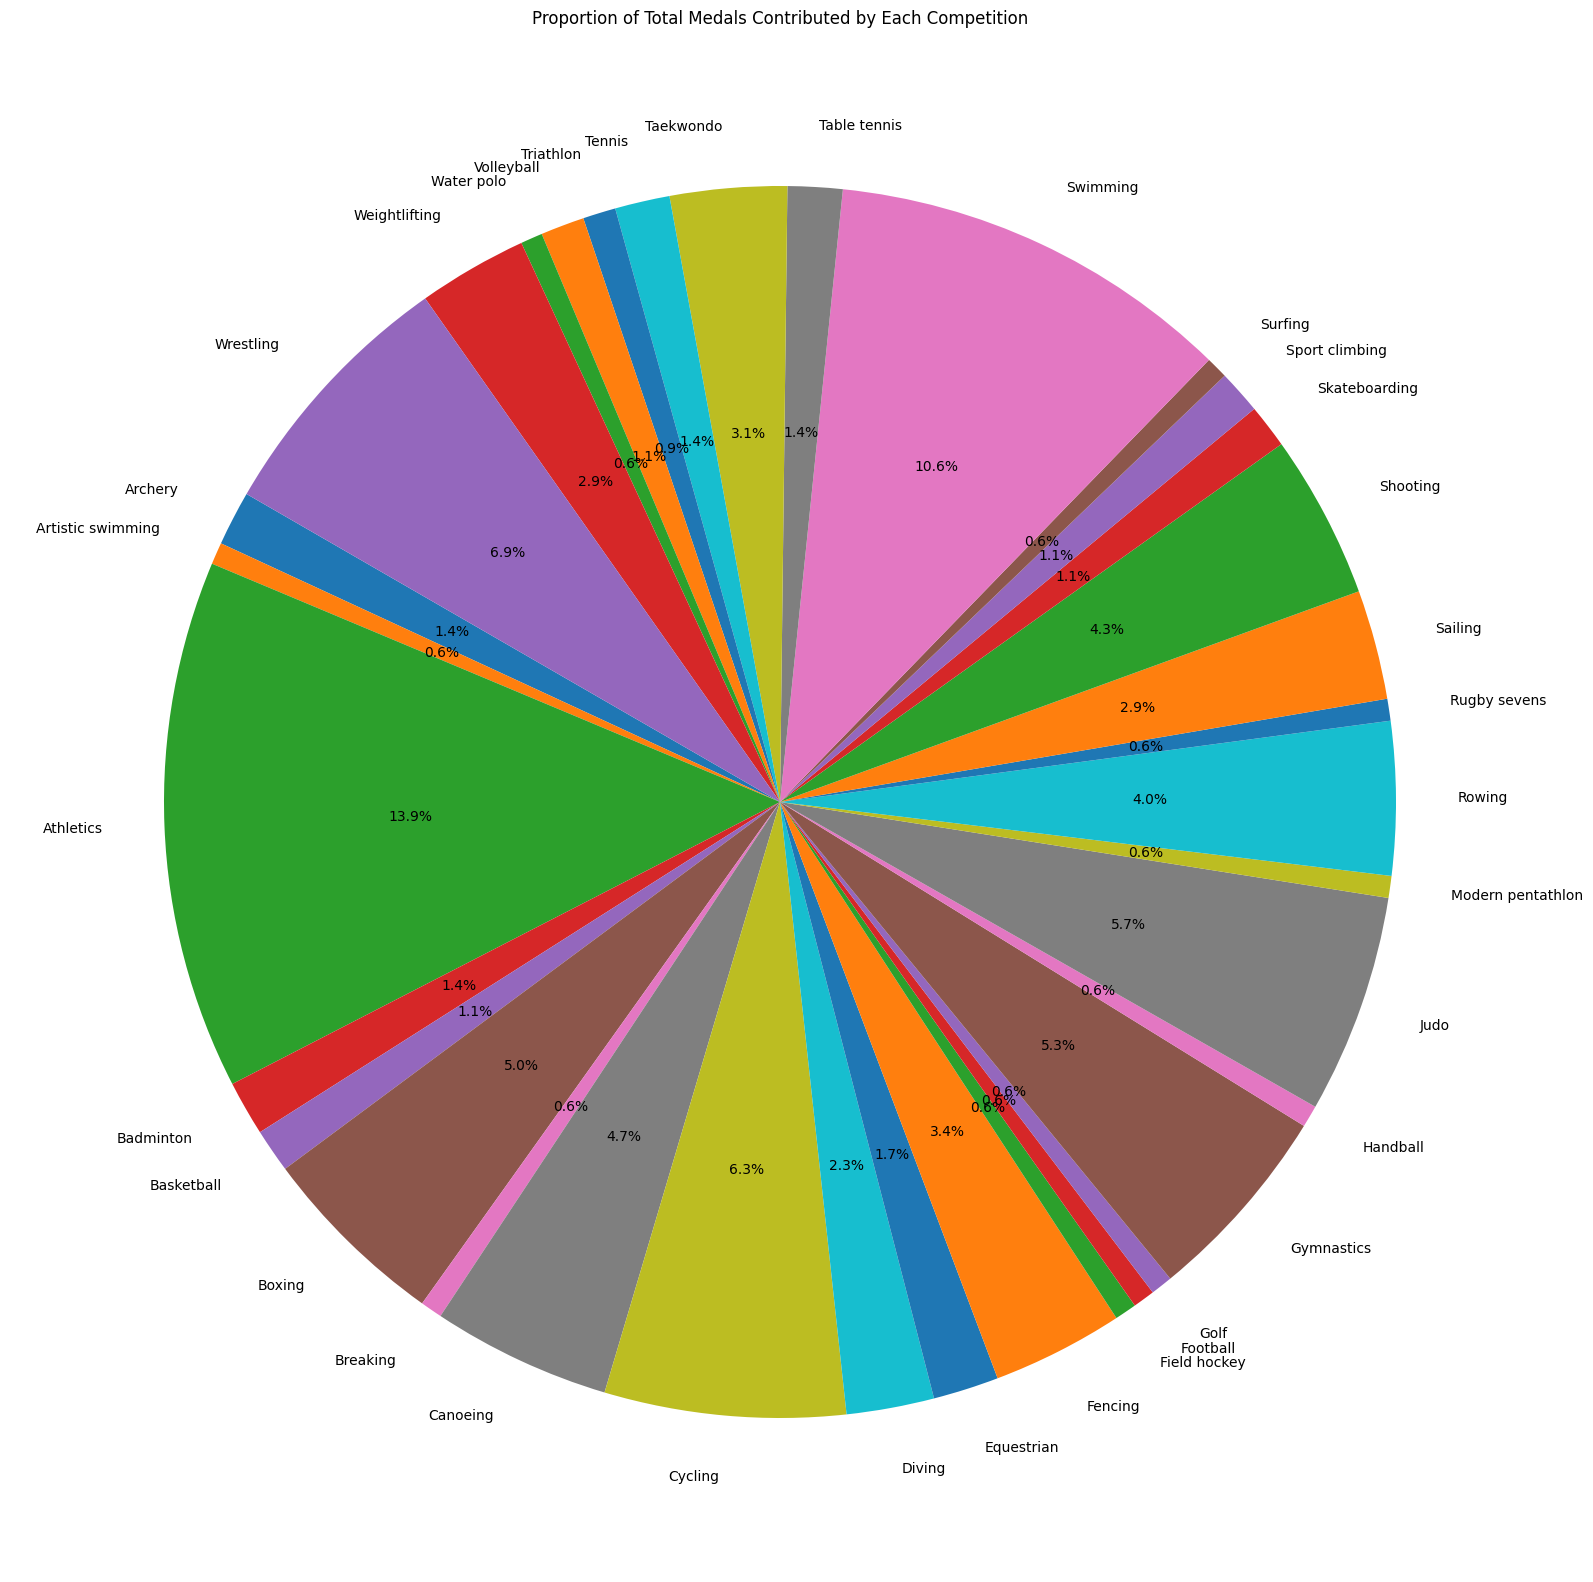

In [648]:
#Q10
medals_by_sport = olympics.groupby('Competitions')['Total'].sum()
total_medals = medals_by_sport.sum()
proportion = (medals_by_sport/total_medals) * 100
print(proportion)

plt.figure(figsize=(27, 20))
plt.pie(proportion, labels=proportion.index, autopct='%1.1f%%', startangle=150)
plt.title('Proportion of Total Medals Contributed by Each Competition')
plt.show()